In [ ]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [ ]:
def getDate(DateString):
    date = DateString.split("-")[0]
    return datetime.datetime.strptime(date, '%Y %b %d')

In [ ]:
df = pd.read_csv('party.csv')

In [ ]:
df.columns = ["Date", "Republican", "Independent", "Democrat"]
df["Date"] = df["Date"].apply(getDate)

# Party Affiliation Data

## Date from Gallup Surveys

In [ ]:
df

# Line Graph of Party affilation in the US over time

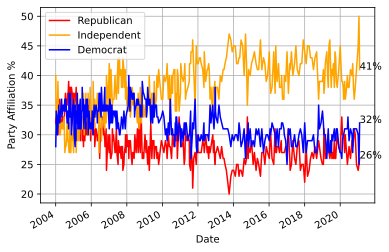

In [78]:
%config InlineBackend.figure_format = 'svg'
df.plot(x="Date", y=["Republican", "Independent", "Democrat"], color=["red", "orange", "blue"])
#Annotate
np = df.to_numpy()
li = (list(np[0]))
plt.annotate(str(li[1]) + "%", (li[0], li[1]))
plt.annotate(str(li[2]) + "%", (li[0], li[2]))
plt.annotate(str(li[3]) + "%", (li[0], li[3]))
#Config
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Party Affiliation %")
plt.grid()

# Pie Plots of party affiliation in selected years

In [71]:
def getPie(year):
    include = df[df['Date'].dt.year == year]
    i = len(include)-1 #Get the last index for the given year
    df1 = pd.DataFrame(include.T[include.index[i]],index=["Republican", "Independent", "Democrat"])
    plt = df1.plot.pie(subplots=True,ylabel=str(df["Date"][include.index[i]])[:10],autopct='%1.1f%%',labeldistance=None,colors=["red", "orange", "blue"])


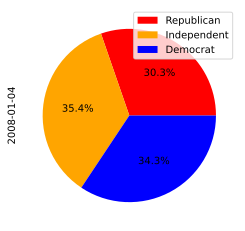

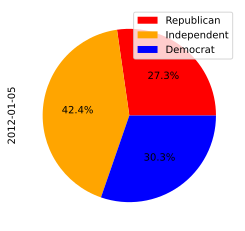

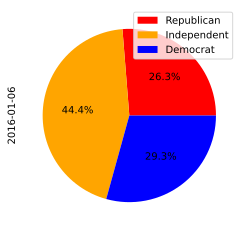

In [75]:
%config InlineBackend.figure_format = 'svg'
getPie(2008)
getPie(2012)
getPie(2016)